In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data=pd.read_csv('fifa.csv')

In [3]:
data.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [4]:
#Columns
data.columns


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [5]:
# Checking if there are any null/missing
data.isnull().sum()


ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

## Data Cleaning

In [31]:
# Data Cleaning
#filling the missing value for the continous variables for proper data visualization

data['Contract Valid Until'].fillna(2019, inplace = True)
data['Value'].fillna(2019, inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['International Reputation'].fillna(1, inplace = True)

In [37]:
#Checking null values after removing 
data.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Skill Moves               18207 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [39]:
data.describe()


,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2438.640523,9.731312,1.112924,2.360356,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5587.859565,21.999290,0.393554,0.755394,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2019.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


In [40]:
# Finding duplicate rows
data.loc[data.duplicated(), :].sort_values('Name').head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause


In [41]:
print("Mean: ", data['Height'].mean())
print("Standard Deviation: ", data['Height'].std())

Mean:  5.946771114415176
Standard Deviation:  0.2205140277712098


In [15]:
#Total Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(data['Nationality'].nunique()))
print(data['Nationality'].value_counts().head(5))

Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


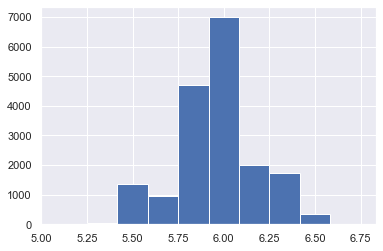

In [11]:
#HIstogram of Heights
sns.set()
data['Height'].hist(bins = 10)

In [16]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(data['Club'].nunique()))
print(data['Club'].value_counts().head(5))

Total number of clubs : 651
Arsenal                33
Eintracht Frankfurt    33
Cardiff City           33
RC Celta               33
CD Leganés             33
Name: Club, dtype: int64


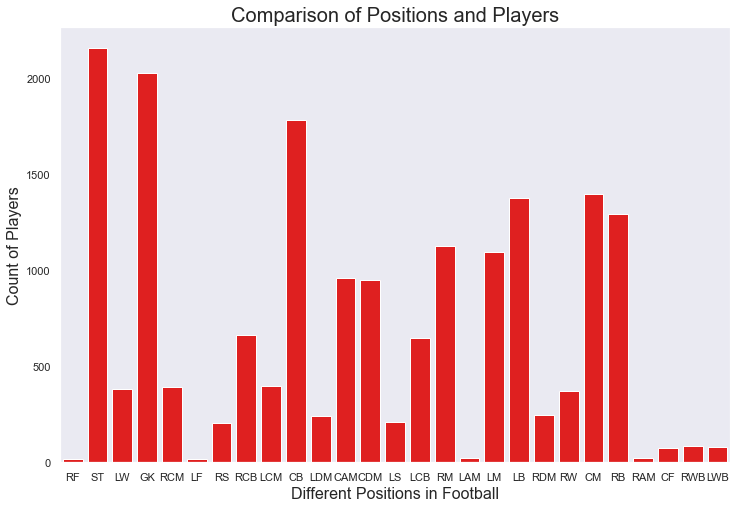

In [17]:
# different positions acquired by the players 

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = data, color = 'red')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

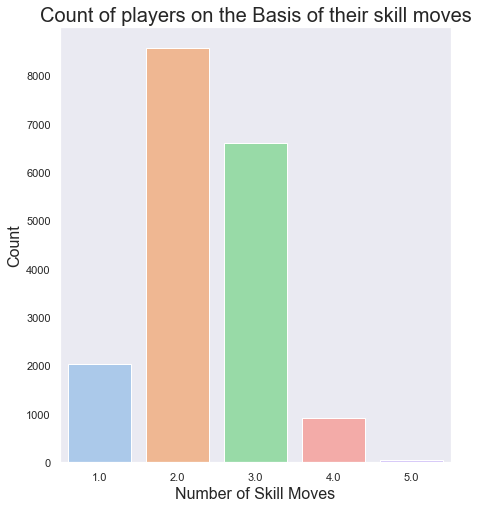

In [19]:
# Skill Moves of Players

plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on the Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [21]:
# Top 5 player distribution as per ratings
data[["Name", 'Age', "Club", "Overall"]].nlargest(5, columns='Overall')

,Name,Age,Club,Overall
0,L. Messi,31,FC Barcelona,94
1,Cristiano Ronaldo,33,Juventus,94
2,Neymar Jr,26,Paris Saint-Germain,92
3,De Gea,27,Manchester United,91
4,K. De Bruyne,27,Manchester City,91


In [22]:
# Bottom 5 player distribution as per ratings
data[["Name", 'Age', "Club", "Overall"]].nsmallest(5, columns='Overall')

,Name,Age,Club,Overall
18206,G. Nugent,16,Tranmere Rovers,46
18186,Zhang Yufeng,20,Beijing Renhe FC,47
18187,C. Ehlich,19,SpVgg Unterhaching,47
18188,L. Collins,17,Newport County,47
18189,A. Kaltner,18,SpVgg Unterhaching,47


In [26]:
#Most common nationalities
print(Counter(data['Nationality'].values).most_common(5))


[('England', 1662), ('Germany', 1198), ('Spain', 1072), ('Argentina', 937), ('France', 914)]


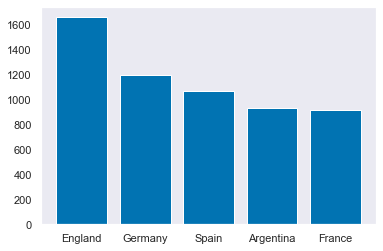

In [28]:
#Plotting the common nationalities
bar_plot = dict(Counter(data['Nationality'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.show()

In [50]:
print('Maximum Potential : '+str(data.loc[data['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(data.loc[data['Overall'].idxmax()][1]))


Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


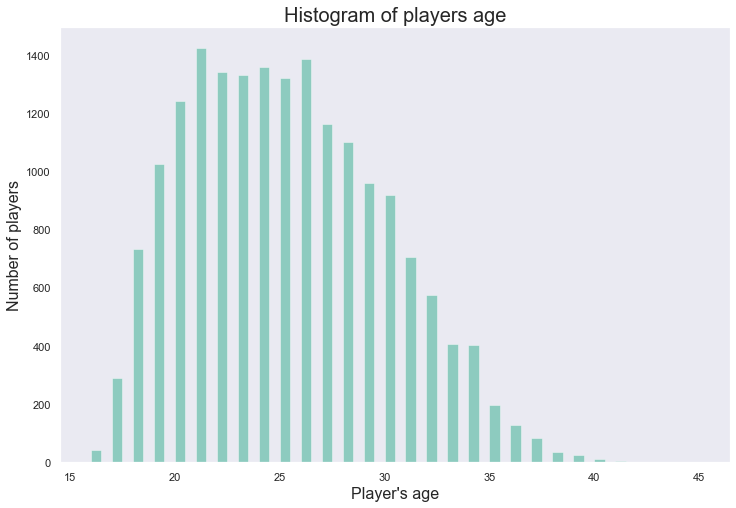

In [32]:
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

In [33]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)


Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

In [43]:
# Finding 10 youngest players from the dataset

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(10)
print(youngest)

                 Name  Age             Club          Nationality
18206       G. Nugent   16  Tranmere Rovers              England
17743       J. Olstad   16  Sarpsborg 08 FF               Norway
13293     H. Massengo   16        AS Monaco               France
16081     J. Italiano   16      Perth Glory            Australia
18166        N. Ayéva   16        Örebro SK               Sweden
17712        K. Broda   16     Wisła Kraków               Poland
17354     L. D'Arrigo   16  Adelaide United            Australia
13567  Y. Verschaeren   16   RSC Anderlecht              Belgium
16927       B. Nygren   16     IFK Göteborg               Sweden
18018     B. O'Gorman   16   Bray Wanderers  Republic of Ireland


In [44]:
# Finding 15 eldest players from the dataset

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

## Thank you